In [60]:
import random
import copy
import numpy as np
from pathlib import Path 
from matplotlib import pyplot as plt
import matplotlib.patches as patches

In [67]:
def get_uv(xyz, mat_view, mat_proj, h, w):
    xyz = np.concatenate([xyz, np.array([1.])])
    mat_view = np.asarray(mat_view).reshape(4, 4)
    mat_proj = np.asarray(mat_proj).reshape(4, 4)
    xyz = np.dot(xyz, mat_view)
    xyz = np.dot(xyz, mat_proj)
    u, v, z = xyz[:3]
    u = u  / z  * (w / 2) + (w / 2)
    v = (1 - v / z)  *  h / 2
    return u, v

def get_2d_bbox(aabb, viewMatrix, projectionMatrix):
    u1, v1 = get_uv(aabb[0], viewMatrix, projectionMatrix, 128, 128)
    u2, v2 = get_uv(aabb[1], viewMatrix, projectionMatrix, 128, 128)
    plot_box(img, (u1, v1), (u2, v2))

In [62]:
def plot_box(img, top_left, bot_right):
    fig, ax = plt.subplots(1)
    x, y = top_left
    w, h = bot_right[0] - x, bot_right[1] - y
    print(x, y)
    print(w, h)
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.imshow(img)
    ax.add_patch(rect)

In [65]:
img = np.load('/home/tony/Desktop/obj_save/img_0.npy')
pos = np.load('/home/tony/Desktop/obj_save/pos_0.npy')
AABB = np.load('/home/tony/Desktop/obj_save/AABB_0.npy')
mat_view = np.load('/home/tony/Desktop/obj_save/view_mat_0.npy')
mat_proj = np.load('/home/tony/Desktop/obj_save/proj_mat_0.npy')

84.80400712455774 49.565214401598716
-61.298975250463535 -37.01315475666268


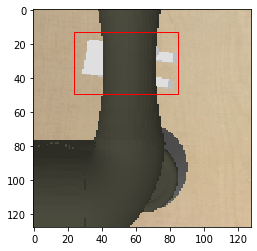

In [68]:
get_2d_bbox(AABB, mat_view, mat_proj)